In [985]:
import numpy as np, pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt, seaborn as sns
import scipy
import warnings
import plotly.express as px
from itertools import product
import statsmodels.api as sm
import datetime
from tqdm import tqdm
import io
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.utils import resample
import statistics
from wordcloud import WordCloud
from numpy import *
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

PART 1 Data Cleaning

In [1008]:
df = pd.read_csv('Covid19-vaccination.csv')
df.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003


In [1009]:
df.shape

(63006, 16)

In [1010]:
df.isna().sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                     27277
people_vaccinated                      28883
people_fully_vaccinated                31853
total_boosters                         56393
daily_vaccinations_raw                 33083
daily_vaccinations                       326
total_vaccinations_per_hundred         27277
people_vaccinated_per_hundred          28883
people_fully_vaccinated_per_hundred    31853
total_boosters_per_hundred             56393
daily_vaccinations_per_million           326
daily_people_vaccinated                 1558
daily_people_vaccinated_per_hundred     1558
dtype: int64

In [1011]:
#drop total_vaccinations missing data, as without this value any raw doesn't make much sense.
df = df.drop(df[df.total_vaccinations.isna()].index)
df.isna().sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                         0
people_vaccinated                       1879
people_fully_vaccinated                 4751
total_boosters                         29169
daily_vaccinations_raw                  5806
daily_vaccinations                       235
total_vaccinations_per_hundred             0
people_vaccinated_per_hundred           1879
people_fully_vaccinated_per_hundred     4751
total_boosters_per_hundred             29169
daily_vaccinations_per_million           235
daily_people_vaccinated                  882
daily_people_vaccinated_per_hundred      882
dtype: int64

In [1012]:
# reset the index
df.index  = np.arange(0,len(df))

In [1013]:
#df.drop(df[df.people_vaccinated.isna()].index).tail()

In [1014]:
check_df = df.drop(df[df.people_vaccinated.isna()].index)

In [1015]:
check_df

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,NaN,1367.0,0.02,0.02,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-03-16,54000.0,54000.0,NaN,NaN,NaN,2862.0,0.14,0.14,NaN,NaN,72.0,2862.0,0.007
3,Afghanistan,AFG,2021-04-07,120000.0,120000.0,NaN,NaN,NaN,3000.0,0.30,0.30,NaN,NaN,75.0,3000.0,0.008
4,Afghanistan,AFG,2021-04-22,240000.0,240000.0,NaN,NaN,NaN,8000.0,0.60,0.60,NaN,NaN,201.0,8000.0,0.020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35724,Zimbabwe,ZWE,2021-11-16,6228119.0,3515140.0,2712979.0,NaN,37816.0,24487.0,41.27,23.29,17.98,NaN,1622.0,17188.0,0.114
35725,Zimbabwe,ZWE,2021-11-18,6310431.0,3583256.0,2727175.0,NaN,NaN,29822.0,41.81,23.74,18.07,NaN,1976.0,22810.0,0.151
35726,Zimbabwe,ZWE,2021-11-19,6362499.0,3625221.0,2737278.0,NaN,52068.0,33163.0,42.16,24.02,18.14,NaN,2197.0,25915.0,0.172
35727,Zimbabwe,ZWE,2021-11-20,6396012.0,3651820.0,2744192.0,NaN,33513.0,34377.0,42.38,24.20,18.18,NaN,2278.0,26983.0,0.179


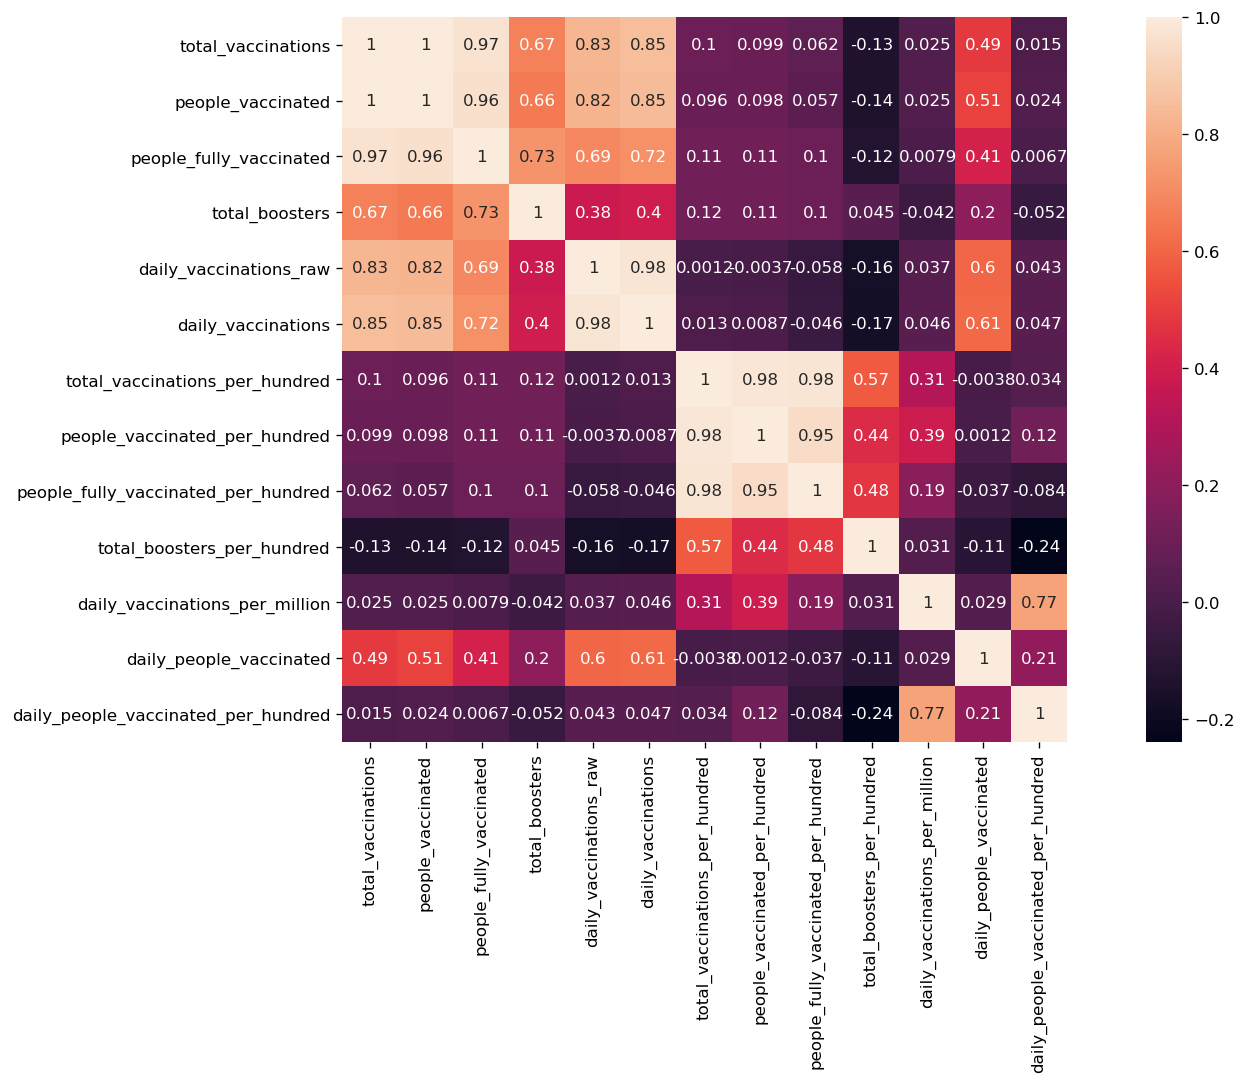

In [1016]:
plt.subplots(figsize=(17, 8))
sns.heatmap(check_df.corr(), annot=True, square=True)
plt.show()

we can see from the above correlation plot and df that 'total_vaccinations' is highly correlated(almost the same) with 'people_vaccinated' and is approximately the sum of  'people_fully_vaccinated' and 'people_vaccinated'. 

we also noticed that 'total_vaccinations_per_hundred' is higly correlated to 'people_vaccinated_per_hundred' , 'people_fully_vaccinated_per_hundred'.
'total_vaccinations_per_hundred' is approximately the sum of 'people_vaccinated_per_hundred' , 'people_fully_vaccinated_per_hundred' and 'total_boosters_per_hundred'.	

'daily_vaccinations_raw' has a high correlation with 'daily_vaccinations'

We will perform some statistical tests for the following features: 

1.'total_vaccinations' and 'people_vaccinated'+'people_fully_vaccinated' + 'total_boosters'

2.'daily_vaccinations_raw' and 'daily_vaccinations' 

3.'total_vaccinations_per_hundred' and 'people_vaccinated_per_hundred' +'people_fully_vaccinated_per_hundred' + 'total_boosters_per_hundred'.

In [1017]:
scipy.stats.mannwhitneyu(check_df.total_vaccinations,check_df.people_vaccinated)

MannwhitneyuResult(statistic=523806931.0, pvalue=2.0801436418698192e-83)

1. H0:averages of the 2 samples are identical.

('total_vaccinations' and 'people_vaccinated'+'people_fully_vaccinated' + 'total_boosters')

In [1020]:
stats.ttest_ind(a=df.total_vaccinations.dropna(),b=(df.people_vaccinated+df.people_fully_vaccinated+\
                df.total_boosters).dropna(),equal_var=False)

Ttest_indResult(statistic=-24.22502821782884, pvalue=1.7722193103672438e-124)

According to the sample t test result, we have a p-value = 0.065>0.05. So we fail to reject the null hypothesis and we conclude that the average of 'total_vaccinations' and the average of 'people_vaccinated'+'people_fully_vaccinated' + 'total_boosters' are the same.

H0: the distribution underlying the 2 samples are the same 

('total_vaccinations' and 'people_vaccinated'+'people_fully_vaccinated' + 'total_boosters')  

In [1021]:
scipy.stats.mannwhitneyu(df.total_vaccinations,(df.people_vaccinated+df.people_fully_vaccinated+\
                df.total_boosters))[1]

0.0

According to Mann-Whitney U rank test, we have a p-value = 0.39>0.05. So we fail to reject the null hypothesis and we conclude that the the distribution of 'total_vaccinations' and the distribution of 'people_vaccinated'+'people_fully_vaccinated' + 'total_boosters' are the same.

2. H0:averages of the 2 samples are identical.

('daily_vaccinations_raw' and 'daily_vaccinations')

In [1001]:
stats.ttest_ind(df.daily_vaccinations_raw.dropna(), df.daily_vaccinations.dropna(),equal_var=False)

Ttest_indResult(statistic=5.373558463463121, pvalue=7.748070019669865e-08)

According to the sample t test result, we have a p-value = 0.67>0.05. So we fail to reject the null hypothesis and we conclude that the average of 'daily_vaccinations_raw' and the average of 'daily_vaccinations' are the same.

3. H0:averages of the 2 samples are identical.

('total_vaccinations_per_hundred' and 'people_vaccinated_per_hundred' +'people_fully_vaccinated_per_hundred'+ 'total_boosters_per_hundred'.)

In [497]:
stats.ttest_ind(a=df.total_vaccinations_per_hundred,b=df.people_vaccinated_per_hundred+\
                df.people_fully_vaccinated_per_hundred + df.total_boosters_per_hundred ,equal_var=False)

Ttest_indResult(statistic=-0.1988078972648314, pvalue=0.8424135838079237)

According to the sample t test result, we have a p-value = 0.84>0.05. So we fail to reject the null hypothesis and we conclude that the average of 'total_vaccinations_per_hundred' and the average of 'people_vaccinated_per_hundred' +'people_fully_vaccinated_per_hundred'+ 'total_boosters_per_hundred'. are the same.

H0: the distribution underlying the 2 samples are the same

('total_vaccinations_per_hundred' and 'people_vaccinated_per_hundred' +'people_fully_vaccinated_per_hundred'+ 'total_boosters_per_hundred'.)

In [974]:
scipy.stats.mannwhitneyu(df.total_vaccinations_per_hundred,df.people_vaccinated_per_hundred+\
                df.people_fully_vaccinated_per_hundred + df.total_boosters_per_hundred )

MannwhitneyuResult(statistic=638243627.5, pvalue=0.49463308616246515)

According to Mann-Whitney U rank test, we have a p-value = 0.49>0.05. So we fail to reject the null hypothesis and we conclude that the distribution of 'total_vaccinations_per_hundred' and the distribution of 'people_vaccinated_per_hundred' +'people_fully_vaccinated_per_hundred'+ 'total_boosters_per_hundred'. are the same.

From the correlation map, we see that the 'total_boosters' may have some relationship with 'people_fully_vaccinated', we will also perform Mann-Whitney U rank test to see if their distributions are the same

H0: the distribution underlying the 2 samples are the same

('people_fully_vaccinated' and 'total_boosters')

In [984]:
scipy.stats.mannwhitneyu(df.total_boosters,df.people_fully_vaccinated)

MannwhitneyuResult(statistic=122472315.0, pvalue=0.0)

According to Mann-Whitney U rank test, we have a p-value = 0.0<0.05. So we reject the null hypothesis and we conclude that the 'people_fully_vaccinated' and 'total_boosters'. have different distributions.

since we have found some underlying relationship based on the correlation matrix, Mann-Whitney U rank test and the sample t tests. we now propose a procedure to deal with the missing values in the features.

1.if any of the'total_vaccinations', 'people_vaccinated','people_fully_vaccinated' , 'total_boosters'
is missing, we calculate it using the formula: 'total_vaccinations' = 'people_vaccinated'+'people_fully_vaccinated' + 'total_boosters'

2.if any of the 'total_vaccinations_per_hundred' , 'people_vaccinated_per_hundred' ,'people_fully_vaccinated_per_hundred','total_boosters_per_hundred'is missing, we calculate it using formula: 'total_vaccinations_per_hundred' = 'people_vaccinated_per_hundred' +'people_fully_vaccinated_per_hundred'+ 'total_boosters_per_hundred

3.if one of 'daily_vaccinations_raw' and 'daily_vaccinations' is missing, we fill it with the other one.

'people_vaccinated','people_fully_vaccinated','people_vaccinated_per_hundred' are columns which numbers are increasing/cumulative for the same location(eg.Finland). So if NAN exists and we cannot approximate it using the above method due to multiple missing values(eg.'people_vaccinated'+'people_fully_vaccinated' are missing), we can replace NAN with the last non NAN number in this location.

The same rationale for 'total_vaccinations_per_hundred' , 'people_vaccinated_per_hundred' ,'people_fully_vaccinated_per_hundred' and 'total_boosters_per_hundred'

In [357]:
for i in range(0,df.shape[0]):
    if np.isnan(df.loc[i,'total_boosters']):
        df.loc[i,'total_boosters'] = df.loc[i,'total_vaccinations'] - df.loc[i,'people_vaccinated'] -\
        df.loc[i,'people_fully_vaccinated']
    #we do not have any other way to fill this feature, since it does not have the same distribution as its correlated features
    df.total_boosters = df.total_boosters.fillna(0)
    
    if np.isnan(df.loc[i,'people_vaccinated']):
        df.loc[i,'people_vaccinated'] = df.loc[i,'total_vaccinations'] - \
        df.loc[i,'people_fully_vaccinated'] - df.loc[i,'total_boosters']
        # if both cell is NAN, we cannot compute the value. 
        # we choose to fill it with the last cell's value if the 'location' doesn't change
        if np.isnan(df.loc[i,'people_fully_vaccinated']) and df.loc[i,'location'] == df.loc[i-1,'location']:
            df.loc[i,'people_vaccinated'] = df.loc[i-1,'people_vaccinated']
        #if it starts a new location and the first data is missing(eg.if first data for Canada is missing, fill it with 0)
        elif df.loc[i,'location'] is not df.loc[i-1,'location']:
            df.loc[i,'people_vaccinated'] = 0
            
    if np.isnan(df.loc[i,'people_fully_vaccinated']):
        df.loc[i,'people_fully_vaccinated'] = df.loc[i,'total_vaccinations'] - \
        df.loc[i,'people_vaccinated']- df.loc[i,'total_boosters']
        # if both cell is NAN, we cannot compute the value. 
        # we choose to fill it with the last cell's value if the 'location' doesn't change
        if np.isnan(df.loc[i,'people_vaccinated']) and df.loc[i,'location'] == df.loc[i-1,'location']:
            df.loc[i,'people_fully_vaccinated'] = df.loc[i-1,'people_fully_vaccinated']    
        #if it starts a new location and the first data is missing            
        elif df.loc[i,'location'] is not df.loc[i-1,'location']:
            df.loc[i,'people_fully_vaccinated'] = 0

    if np.isnan(df.loc[i,'total_boosters_per_hundred']):
        df.loc[i,'total_boosters_per_hundred'] = df.loc[i,'total_vaccinations_per_hundred'] - \
        df.loc[i,'people_vaccinated_per_hundred'] - df.loc[i,'people_fully_vaccinated_per_hundred']
    #we do not have any other way to fill this feature, since it does not have any strongly correlated features
    df.total_boosters_per_hundred = df.total_boosters_per_hundred.fillna(0)
        
    if np.isnan(df.loc[i,'people_vaccinated_per_hundred']):
        df.loc[i,'people_vaccinated_per_hundred'] = df.loc[i,'total_vaccinations_per_hundred'] - \
        df.loc[i,'people_fully_vaccinated_per_hundred'] - df.loc[i,'total_boosters_per_hundred']
        # if both cell is NAN, we cannot compute the value. 
        # we choose to fill it with the last cell's value if the 'location' doesn't change
        if np.isnan(df.loc[i,'people_fully_vaccinated_per_hundred']) and df.loc[i,'location'] == df.loc[i-1,'location']:
            df.loc[i,'people_vaccinated_per_hundred'] = df.loc[i-1,'people_vaccinated_per_hundred']  
        #if it starts a new location and the first data is missing            
        elif df.loc[i,'location'] is not df.loc[i-1,'location']:
            df.loc[i,'people_vaccinated_per_hundred'] = 0
            
    if np.isnan(df.loc[i,'people_fully_vaccinated_per_hundred']):
        df.loc[i,'people_fully_vaccinated_per_hundred'] = df.loc[i,'total_vaccinations_per_hundred'] -\
        df.loc[i,'people_vaccinated_per_hundred']- df.loc[i,'total_boosters_per_hundred']
        # if both cell is NAN, we cannot compute the value. 
        # we choose to fill it with the last cell's value if the 'location' doesn't change
        if np.isnan(df.loc[i,'people_vaccinated_per_hundred']) and df.loc[i,'location'] == df.loc[i-1,'location']:
            df.loc[i,'people_fully_vaccinated_per_hundred'] = df.loc[i-1,'people_fully_vaccinated_per_hundred']  
        #if it starts a new location and the first data is missing            
        elif df.loc[i,'location'] is not df.loc[i-1,'location']:
            df.loc[i,'people_fully_vaccinated_per_hundred'] = 0  
        
    if np.isnan(df.loc[i,'daily_vaccinations_raw']):
        df.loc[i,'daily_vaccinations_raw'] = df.loc[i,'daily_vaccinations'] 
        
    elif np.isnan(df.loc[i,'daily_vaccinations']):
        df.loc[i,'daily_vaccinations'] = df.loc[i,'daily_vaccinations_raw'] 
        
    #we approximate per_million data and per_hundred data using simple math
    if np.isnan(df.loc[i,'daily_vaccinations_per_million']):
        df.loc[i,'daily_vaccinations_per_million'] = df.loc[i,'daily_people_vaccinated_per_hundred'] *\
        10000
        
    elif np.isnan(df.loc[i,'daily_people_vaccinated_per_hundred']):
        df.loc[i,'daily_people_vaccinated_per_hundred'] = df.loc[i,'daily_vaccinations_per_million'] /\
        10000
        

In [358]:
"""
elif np.isnan(df.loc[i,'total_boosters']):
        df.loc[i,'total_boosters'] = df.loc[i,'total_vaccinations'] - df.loc[i,'people_vaccinated']\
        - df.loc[i,'people_fully_vaccinated']
    elif np.isnan(df.loc[i,'total_boosters_per_hundred']):
        df.loc[i,'total_boosters_per_hundred'] = df.loc[i,'total_vaccinations_per_hundred'] - df.loc[i,'people_vaccinated_per_hundred']\
        - df.loc[i,'people_fully_vaccinated_per_hundred'] 
        
"""

"\nelif np.isnan(df.loc[i,'total_boosters']):\n        df.loc[i,'total_boosters'] = df.loc[i,'total_vaccinations'] - df.loc[i,'people_vaccinated']        - df.loc[i,'people_fully_vaccinated']\n    elif np.isnan(df.loc[i,'total_boosters_per_hundred']):\n        df.loc[i,'total_boosters_per_hundred'] = df.loc[i,'total_vaccinations_per_hundred'] - df.loc[i,'people_vaccinated_per_hundred']        - df.loc[i,'people_fully_vaccinated_per_hundred'] \n        \n"

In [359]:
df

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,NaN,NaN,0.00,0.00,0.00,0.0,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-28,8200.0,8200.0,0.0,0.0,1367.0,1367.0,0.02,0.02,0.00,0.0,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-03-16,54000.0,54000.0,0.0,0.0,2862.0,2862.0,0.14,0.14,0.00,0.0,72.0,2862.0,0.007
3,Afghanistan,AFG,2021-04-07,120000.0,120000.0,0.0,0.0,3000.0,3000.0,0.30,0.30,0.00,0.0,75.0,3000.0,0.008
4,Afghanistan,AFG,2021-04-22,240000.0,240000.0,0.0,0.0,8000.0,8000.0,0.60,0.60,0.00,0.0,201.0,8000.0,0.020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35724,Zimbabwe,ZWE,2021-11-16,6228119.0,3515140.0,2712979.0,0.0,37816.0,24487.0,41.27,23.29,17.98,0.0,1622.0,17188.0,0.114
35725,Zimbabwe,ZWE,2021-11-18,6310431.0,3583256.0,2727175.0,0.0,29822.0,29822.0,41.81,23.74,18.07,0.0,1976.0,22810.0,0.151
35726,Zimbabwe,ZWE,2021-11-19,6362499.0,3625221.0,2737278.0,0.0,52068.0,33163.0,42.16,24.02,18.14,0.0,2197.0,25915.0,0.172
35727,Zimbabwe,ZWE,2021-11-20,6396012.0,3651820.0,2744192.0,0.0,33513.0,34377.0,42.38,24.20,18.18,0.0,2278.0,26983.0,0.179


In [360]:
# we can see that we only have a few NANs left in contrast to the large amount of NANs at the beginning
# we fill the rest of the NAN values with 0 which cannot be derived from their correlated features
df.isna().sum()

location                                 0
iso_code                                 0
date                                     0
total_vaccinations                       0
people_vaccinated                        0
people_fully_vaccinated                  0
total_boosters                           0
daily_vaccinations_raw                 235
daily_vaccinations                     235
total_vaccinations_per_hundred           0
people_vaccinated_per_hundred            0
people_fully_vaccinated_per_hundred      0
total_boosters_per_hundred               0
daily_vaccinations_per_million         233
daily_people_vaccinated                882
daily_people_vaccinated_per_hundred    233
dtype: int64

In [ ]:
#df.to_csv('a.csv',index=False)

In [361]:
df.daily_vaccinations_raw = df.daily_vaccinations_raw.fillna(0)
df.daily_vaccinations = df.daily_vaccinations.fillna(0)
df.daily_vaccinations_per_million = df.daily_vaccinations_per_million.fillna(0)
df.daily_people_vaccinated = df.daily_people_vaccinated.fillna(0)
df.daily_people_vaccinated_per_hundred = df.daily_people_vaccinated_per_hundred.fillna(0)
df.isna().sum()

location                               0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
total_boosters                         0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
total_boosters_per_hundred             0
daily_vaccinations_per_million         0
daily_people_vaccinated                0
daily_people_vaccinated_per_hundred    0
dtype: int64

PART 2 Data Visualization and Exploratory Data Analysis

In [363]:
df

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000
1,Afghanistan,AFG,2021-02-28,8200.0,8200.0,0.0,0.0,1367.0,1367.0,0.02,0.02,0.00,0.0,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-03-16,54000.0,54000.0,0.0,0.0,2862.0,2862.0,0.14,0.14,0.00,0.0,72.0,2862.0,0.007
3,Afghanistan,AFG,2021-04-07,120000.0,120000.0,0.0,0.0,3000.0,3000.0,0.30,0.30,0.00,0.0,75.0,3000.0,0.008
4,Afghanistan,AFG,2021-04-22,240000.0,240000.0,0.0,0.0,8000.0,8000.0,0.60,0.60,0.00,0.0,201.0,8000.0,0.020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35724,Zimbabwe,ZWE,2021-11-16,6228119.0,3515140.0,2712979.0,0.0,37816.0,24487.0,41.27,23.29,17.98,0.0,1622.0,17188.0,0.114
35725,Zimbabwe,ZWE,2021-11-18,6310431.0,3583256.0,2727175.0,0.0,29822.0,29822.0,41.81,23.74,18.07,0.0,1976.0,22810.0,0.151
35726,Zimbabwe,ZWE,2021-11-19,6362499.0,3625221.0,2737278.0,0.0,52068.0,33163.0,42.16,24.02,18.14,0.0,2197.0,25915.0,0.172
35727,Zimbabwe,ZWE,2021-11-20,6396012.0,3651820.0,2744192.0,0.0,33513.0,34377.0,42.38,24.20,18.18,0.0,2278.0,26983.0,0.179


#1.which countries has the most fully vaccinated people?

In [400]:
noncountries = ['World', 'Upper middle income','Lower middle income', 'High income', \
                'Lower middle income','Low income', 'Asia', 'South America','Africa' , \
                'Europe','North America','European Union','Oceania','South Africa']
              
locations = set(df[~df['location'].isin(noncountries)].location)

In [401]:
len(locations)

222

In [402]:
len(df['location'].unique())

235

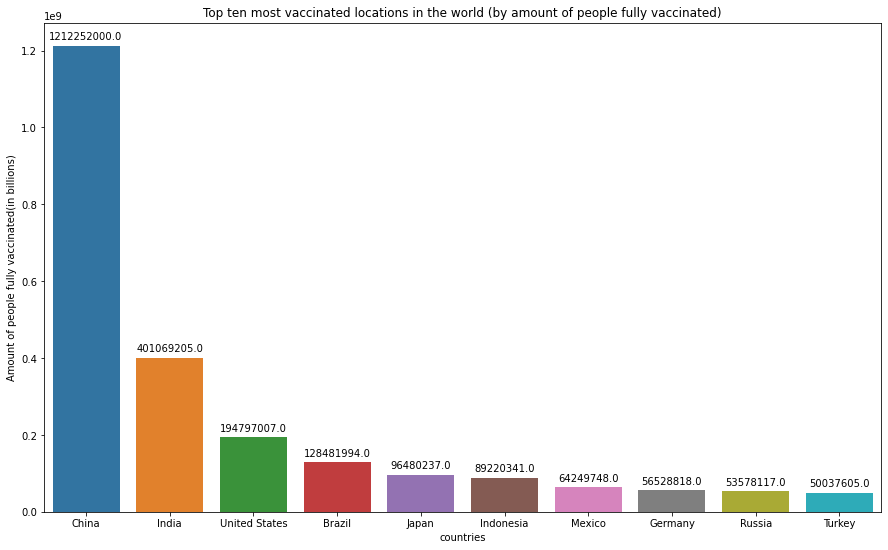

In [422]:
top_fully_vaccinated = df[df['location'].isin(locations)].groupby('location') \
.people_fully_vaccinated.max() .sort_values(ascending=False).dropna(axis=0).reset_index() 
# Dropping NaN values

#display(top_fully_vaccinated[0:10])

# Plotting a barplot for data viz using matplotlib and seaborn
plt.figure(figsize=(15, 9))
plt.title('Top ten most vaccinated locations in the world (by amount of people fully vaccinated)')
splot = sns.barplot(x=top_fully_vaccinated['location'][0:10], y=top_fully_vaccinated['people_fully_vaccinated'][0:10])
plt.xlabel('countries')
plt.ylabel('Amount of people fully vaccinated(in billions)')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

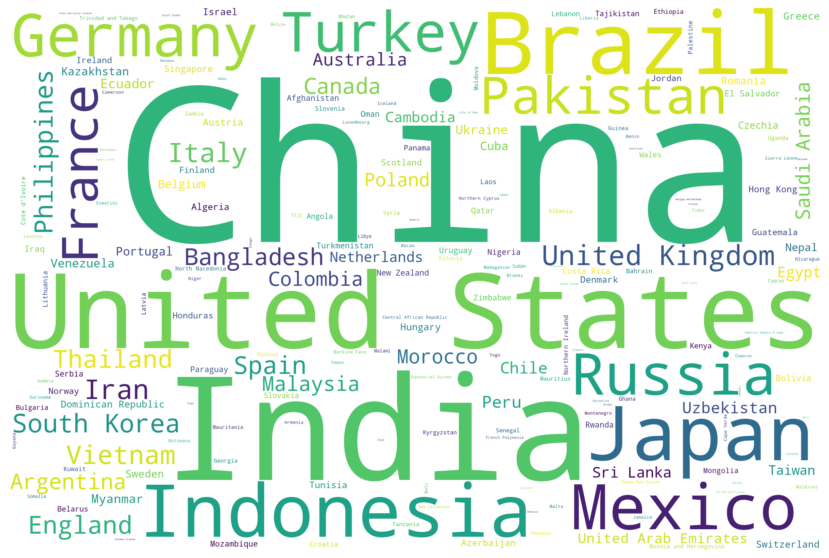

In [405]:
d = {}
for a, x in top_fully_vaccinated.values:
    d[a] = x

wordcloud = WordCloud(background_color = "white",width = 2400, height = 1600)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#2.which countries has the most fully vaccination rate?

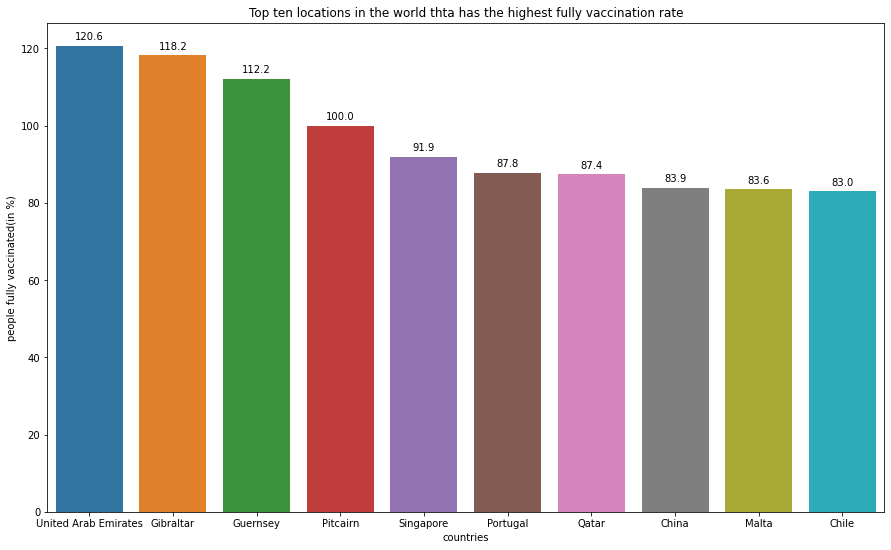

In [423]:
top_vaccinated_rate = df[df['location'].isin(locations)].groupby('location') \
.people_fully_vaccinated_per_hundred.max().sort_values(ascending=False).dropna(axis=0).reset_index() 
# Dropping NaN values

#display(top_vaccinated_rate[0:10])

# Plotting a barplot for data viz using matplotlib and seaborn
plt.figure(figsize=(15, 9))
plt.title('Top ten locations in the world thta has the highest fully vaccination rate')
splot = sns.barplot(x=top_vaccinated_rate['location'][0:10], y=top_vaccinated_rate['people_fully_vaccinated_per_hundred'][0:10])
plt.xlabel('countries')
plt.ylabel('people fully vaccinated(in %)')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

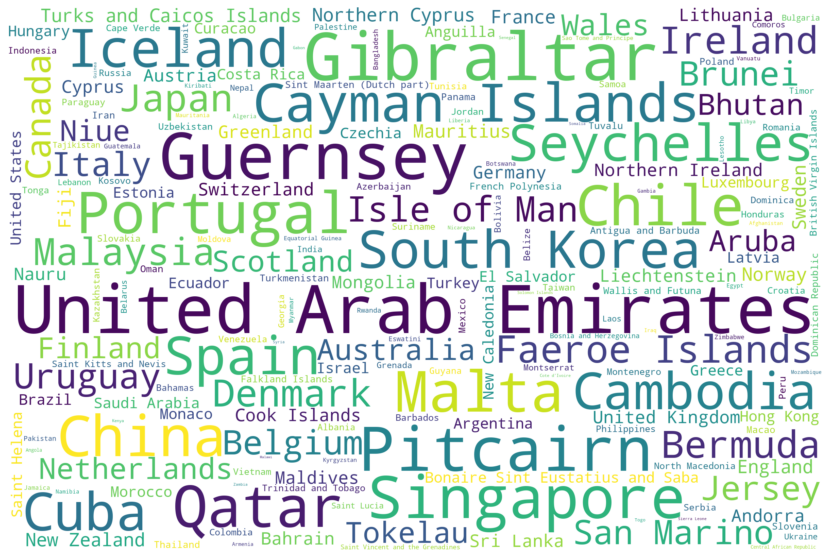

In [417]:
d = {}
for a, x in top_vaccinated_rate.values:
    d[a] = x

wordcloud = WordCloud(background_color = "white",width = 2400, height = 1600)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#3.which countries are the most active in participating in covid vaccination?

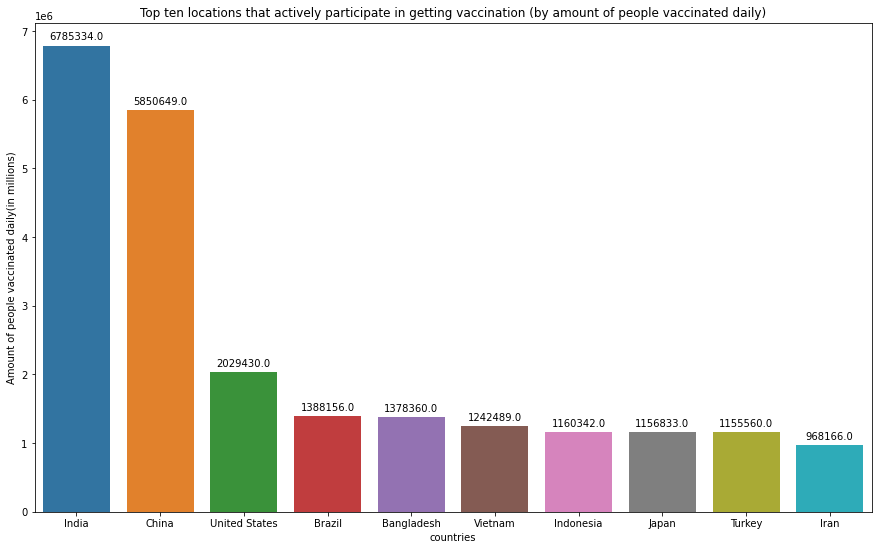

In [427]:
top_people_vaccinated = df[df['location'].isin(locations)].groupby('location') \
.daily_people_vaccinated.max() .sort_values(ascending=False).dropna(axis=0).reset_index() 
# Dropping NaN values

#display(top_people_vaccinated[0:10])

# Plotting a barplot for data viz using matplotlib and seaborn
plt.figure(figsize=(15, 9))
plt.title('Top ten locations that actively participate in getting vaccination (by amount of people vaccinated daily)')
splot = sns.barplot(x=top_people_vaccinated['location'][0:10], y=top_people_vaccinated['daily_people_vaccinated'])
plt.xlabel('countries')
plt.ylabel('Amount of people vaccinated daily(in millions)');

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

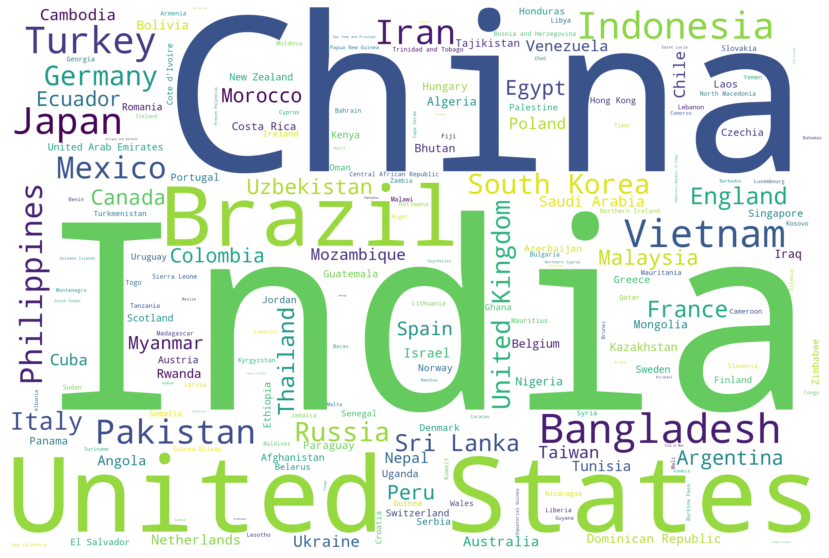

In [413]:
d = {}
for a, x in top_people_vaccinated.values:
    d[a] = x

wordcloud = WordCloud(background_color = "white",width = 2400, height = 1600)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#4 what is the progression of the fully vaccinated people over time?

In [428]:
top_fully_vaccinated

,location,people_fully_vaccinated
0,China,1.212252e+09
1,India,4.010692e+08
2,United States,1.947970e+08
3,Brazil,1.284820e+08
4,Japan,9.648024e+07
...,...,...
217,Montserrat,1.417000e+03
218,Niue,1.150000e+03
219,Tokelau,9.680000e+02
220,Burundi,4.940000e+02


In [429]:
df.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000
1,Afghanistan,AFG,2021-02-28,8200.0,8200.0,0.0,0.0,1367.0,1367.0,0.02,0.02,0.0,0.0,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-03-16,54000.0,54000.0,0.0,0.0,2862.0,2862.0,0.14,0.14,0.0,0.0,72.0,2862.0,0.007
3,Afghanistan,AFG,2021-04-07,120000.0,120000.0,0.0,0.0,3000.0,3000.0,0.30,0.30,0.0,0.0,75.0,3000.0,0.008
4,Afghanistan,AFG,2021-04-22,240000.0,240000.0,0.0,0.0,8000.0,8000.0,0.60,0.60,0.0,0.0,201.0,8000.0,0.020


In [431]:
top_fully_vaccinated_countries = list(top_fully_vaccinated.loc[0:10,'location'].values)
top_fully_vaccinated_countries

['China',
 'India',
 'United States',
 'Brazil',
 'Japan',
 'Indonesia',
 'Mexico',
 'Germany',
 'Russia',
 'Turkey',
 'Pakistan']

In [432]:
temp = df[['location', 'date', 'people_fully_vaccinated']].sort_values(by='people_fully_vaccinated', ascending=True)
temp = temp[temp['location'].isin(top_fully_vaccinated_countries)].dropna()
temp

,location,date,people_fully_vaccinated
14108,India,2021-02-09,0.000000e+00
14107,India,2021-02-08,0.000000e+00
14106,India,2021-02-07,0.000000e+00
14105,India,2021-02-06,0.000000e+00
14104,India,2021-02-05,0.000000e+00
...,...,...,...
6100,China,2021-08-09,1.173049e+09
6101,China,2021-08-10,1.186092e+09
6102,China,2021-08-11,1.198238e+09
6203,China,2021-11-20,1.205743e+09


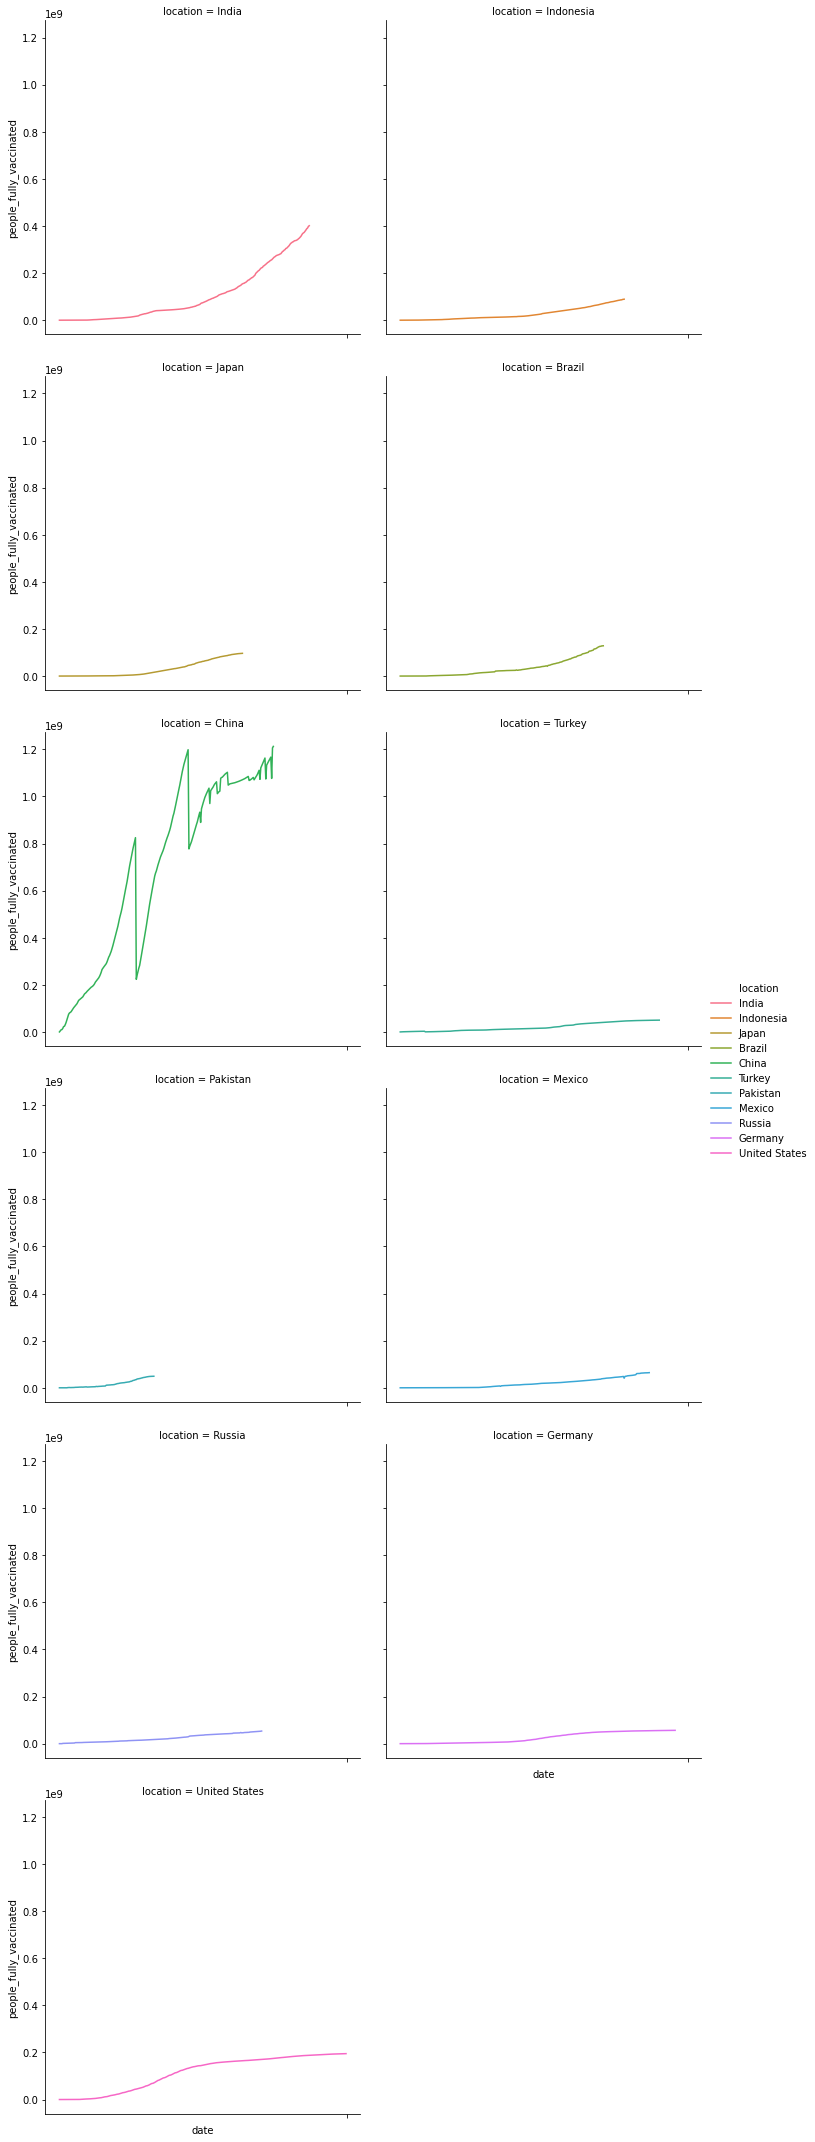

In [433]:
sns.relplot(data=temp, x='date', y='people_fully_vaccinated', hue='location', col='location', kind='line', col_wrap=2)
plt.xticks('');

PART3 Model selection and fitting to data

Monte Carlo simulation modelling

Canada

In [637]:
df_canada = df[df['location'] == 'Canada']
df_canada.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
5097,Canada,CAN,2020-12-14,5.0,5.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000
5098,Canada,CAN,2020-12-15,727.0,727.0,0.0,0.0,722.0,722.0,0.00,0.00,0.0,0.0,19.0,722.0,0.002
5099,Canada,CAN,2020-12-16,3016.0,3016.0,0.0,0.0,2289.0,1506.0,0.01,0.01,0.0,0.0,40.0,1506.0,0.004
5100,Canada,CAN,2020-12-17,7267.0,7267.0,0.0,0.0,4251.0,2421.0,0.02,0.02,0.0,0.0,64.0,2421.0,0.006
5101,Canada,CAN,2020-12-18,11276.0,11276.0,0.0,0.0,4009.0,2818.0,0.03,0.03,0.0,0.0,74.0,2818.0,0.007


compute the increase in the vaccination rate

In [638]:
# store the increase in vaccination rate
df_canada['vr_increase'] = df_canada['people_vaccinated_per_hundred']-df_canada['people_vaccinated_per_hundred'].shift(1) 
df_canada = df_canada.dropna()
print(df_canada['vr_increase'])

5098    0.00
5099    0.01
5100    0.01
5101    0.01
5102    0.00
        ... 
5435    0.06
5436    0.05
5437    0.03
5438    0.03
5439    0.02
Name: vr_increase, Length: 342, dtype: float64


We want to predict the vaccination rate of Canadian people 50 days after the last date indicated in the dataframe.

So our initial vaccination rate should be 79.21% indicated in the last row in df

In [639]:
v0 = df_canada['people_vaccinated_per_hundred'].max()
v0

79.21

compute average rate of increase and standard deviation of the rate of increase in the vaccination rate

In [640]:
#mean_increase = float(np.mean(np.array(df_canada[['vr_increase']])))
#std_increase = float(np.std(np.array(df_canada[['vr_increase']])))
#print ("average increase in vaccination rate = {}, st. dev  = {}.".format(mean_increase, std_increase))

In [641]:
mean_increase = float(df_canada[['vr_increase']].mean())
std_increase = float(df_canada[['vr_increase']].std())
print ("average increase in vaccination rate = {}, st. dev  = {}.".format(mean_increase, std_increase))

average increase in vaccination rate = 0.2316081871345029, st. dev  = 0.27164544500508714.


To use monte carlo simulation, we assume our increase in vaccination rate daily follows Gaussian distribution

Since it is possible to generate negative numbers because std > mean,and the increase in the rate of vaccination should not be negative, we will fill negative numbers with 0 in our case.

In [642]:
# we create 100 scenarios and random numbers follows Gaussian distribution 
# with mean and sd specified above
# Simulate 50 columns of 2000 observations each of single day increase:
Ns = 2000 # Number of scenarios
r_speriod50 = np.random.normal(mean_increase, std_increase, (Ns,50))
r_speriod50[r_speriod50<0] = 0
r_speriod50.shape

(2000, 50)

In [643]:
(np.sum( r_speriod50 ,axis =1) + v0)[:50]

array([94.35494426, 90.5756107 , 93.76080456, 92.0413428 , 90.5450042 ,
       90.21917856, 92.47149695, 92.26285352, 91.41726765, 94.06630959,
       90.31236937, 89.20394524, 94.15743906, 90.3956361 , 91.17469184,
       95.1778787 , 91.14114183, 89.89149399, 93.61418966, 94.51164105,
       96.53939987, 93.10977943, 90.87071957, 93.61994217, 92.37420194,
       93.64591513, 91.06382317, 91.69022877, 91.45836501, 92.80444599,
       92.13597466, 92.3697428 , 89.56610434, 89.57548003, 97.37177515,
       92.39070265, 91.71199873, 92.70690241, 90.98756419, 92.27599126,
       92.6192392 , 91.0796693 , 92.82565684, 94.01008905, 90.32035854,
       93.01319217, 91.38037045, 91.26916794, 92.77749539, 93.67886107])

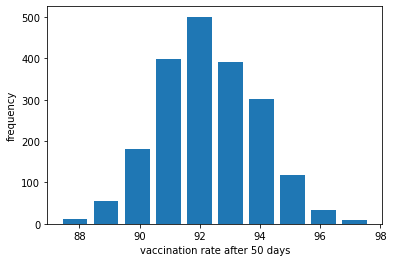

In [644]:
v50 = np.sum(r_speriod50 ,axis =1) + v0
# distribution of the simulations
hist, bins = histogram(v50)
positions = (bins[:-1] + bins[1:]) / 2
width = (bins[1] - bins[0]) * 0.8
plt.bar(positions, hist, width=width)
plt.xlabel('vaccination rate after 50 days')
plt.ylabel('frequency')
plt.show()

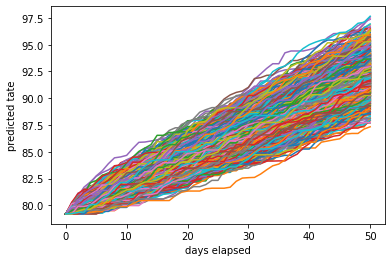

In [645]:
#plot the simulations
for scenario in r_speriod50:
    y = [np.sum(scenario[0:i]) + v0 for i in range(0,51)]
    plt.plot(range(0,51), y)
plt.xlabel('days elapsed')
plt.ylabel('predicted tate')
plt.show()

In [646]:
#best scenario
#max(v50)
percentile(v50, [95])#using 95% confidence interval

array([95.05315714])

In [647]:
#worst scenario
#min(v50)
percentile(v50, [5])#using 95% confidence interval

array([89.6734271])

In [648]:
#base scenario
#median(v50)
percentile(v50, [50])

array([92.19411676])

We apply the same procedure for another chosen country: the US

the US

In [649]:
df_us = df[df['location'] == 'United States']
df_us.tail()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
33685,United States,USA,2021-11-17,449028238.0,229584222.0,194561634.0,33834775.0,1479995.0,1297921.0,133.51,68.26,57.85,10.06,3859.0,444416.0,0.132
33686,United States,USA,2021-11-18,450381454.0,229972864.0,194694936.0,34677686.0,1353216.0,1288385.0,133.91,68.38,57.89,10.31,3831.0,427578.0,0.127
33687,United States,USA,2021-11-19,451355421.0,230255670.0,194788580.0,35282993.0,973967.0,1174321.0,134.20,68.46,57.92,10.49,3492.0,383614.0,0.114
33688,United States,USA,2021-11-20,451453834.0,230298744.0,194797007.0,35329604.0,98413.0,1039368.0,134.23,68.48,57.92,10.50,3090.0,321539.0,0.096
33689,United States,USA,2021-11-21,451453834.0,230298744.0,194797007.0,35329604.0,0.0,964233.0,134.23,68.48,57.92,10.50,2867.0,289854.0,0.086


In [650]:
# store the increase in vaccination rate
df_us['vr_increase'] = df_us['people_vaccinated_per_hundred']-df_us['people_vaccinated_per_hundred'].shift(1) 
df_us = df_us.dropna()
print(df_us['vr_increase'])

33347    0.00
33348    0.01
33349    0.05
33350    0.07
33351    0.12
         ... 
33685    0.13
33686    0.12
33687    0.08
33688    0.02
33689    0.00
Name: vr_increase, Length: 343, dtype: float64


We want to predict the vaccination rate of Ameriacan people 50 days after the last date indicated in the dataframe.

So our initial vaccination rate should be 68.48% indicated in the last row in df

In [651]:
v0 = df_us['people_vaccinated_per_hundred'].max()
v0

68.48

In [652]:
mean_increase = float(df_us[['vr_increase']].mean())
std_increase = float(df_us[['vr_increase']].std())
print ("average increase in vaccination rate = {}, st. dev  = {}.".format(mean_increase, std_increase))

average increase in vaccination rate = 0.19962099125364433, st. dev  = 0.17015688262388243.


In [653]:
# we create 100 scenarios and random numbers follows Gaussian distribution 
# with mean and sd specified above
# Simulate 50 columns of 2000 observations each of single day increase:
Ns = 2000 # Number of scenarios
r_speriod50 = np.random.normal(mean_increase, std_increase, (Ns,50))
r_speriod50[r_speriod50<0] = 0
r_speriod50.shape

(2000, 50)

In [654]:
(np.sum( r_speriod50 ,axis =1) + v0)[:50]

array([79.63404578, 80.04929998, 80.35938628, 79.57549401, 77.49440566,
       77.16383068, 78.05221141, 79.96462194, 79.35619291, 79.21734856,
       81.19400802, 78.41834512, 78.2787803 , 78.24615558, 79.37599509,
       79.77603988, 80.64550695, 79.36283903, 80.30956811, 79.27507797,
       78.18201088, 78.34343023, 78.8645194 , 79.45905969, 79.14321502,
       78.27456432, 76.74328389, 77.52574319, 79.82488382, 80.78211047,
       79.90033521, 76.90054198, 81.42939751, 79.31647248, 77.0201563 ,
       78.84516121, 78.44467213, 77.98614377, 79.1996424 , 78.50635494,
       79.3501359 , 78.20629947, 79.10080372, 78.11596744, 76.71180501,
       78.23723949, 80.138605  , 79.5324122 , 80.45590253, 79.08749498])

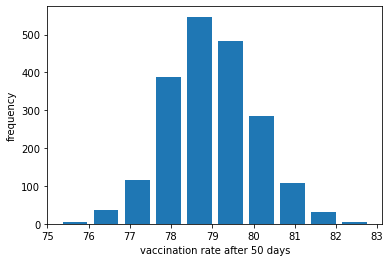

In [655]:
v50 = np.sum(r_speriod50 ,axis =1) + v0
# distribution of the simulations
hist, bins = histogram(v50)
positions = (bins[:-1] + bins[1:]) / 2
width = (bins[1] - bins[0]) * 0.8
plt.bar(positions, hist, width=width)
plt.xlabel('vaccination rate after 50 days')
plt.ylabel('frequency')
plt.show()

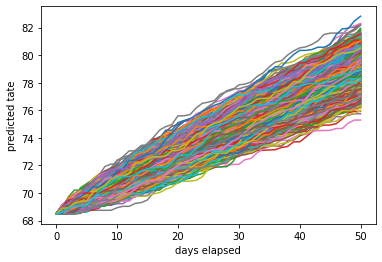

In [656]:
#plot the simulations
for scenario in r_speriod50:
    y = [np.sum(scenario[0:i]) + v0 for i in range(0,51)]
    plt.plot(range(0,51), y)
plt.xlabel('days elapsed')
plt.ylabel('predicted tate')
plt.show()

In [657]:
#best scenario
#max(v50)
percentile(v50, [95])#using 95% confidence interval

array([80.78211289])

In [658]:
#worst scenario
#min(v50)
percentile(v50, [5])#using 95% confidence interval

array([77.27344063])

In [659]:
#base scenario
#median(v50)
percentile(v50, [50])

array([78.96196307])

we will also try the arima model to compare the results of the 2 models

ARIMA

First let's apply the model on Canada

In [822]:
df_canada = df[df['location'] == 'Canada'] 
df_canada

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
5097,Canada,CAN,2020-12-14,5.0,5.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000
5098,Canada,CAN,2020-12-15,727.0,727.0,0.0,0.0,722.0,722.0,0.00,0.00,0.00,0.00,19.0,722.0,0.002
5099,Canada,CAN,2020-12-16,3016.0,3016.0,0.0,0.0,2289.0,1506.0,0.01,0.01,0.00,0.00,40.0,1506.0,0.004
5100,Canada,CAN,2020-12-17,7267.0,7267.0,0.0,0.0,4251.0,2421.0,0.02,0.02,0.00,0.00,64.0,2421.0,0.006
5101,Canada,CAN,2020-12-18,11276.0,11276.0,0.0,0.0,4009.0,2818.0,0.03,0.03,0.00,0.00,74.0,2818.0,0.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5435,Canada,CAN,2021-11-17,59776509.0,30102545.0,28764923.0,909041.0,76112.0,61164.0,157.03,79.08,75.56,2.39,1607.0,14376.0,0.038
5436,Canada,CAN,2021-11-18,59852559.0,30121803.0,28795770.0,934986.0,76050.0,66659.0,157.23,79.13,75.64,2.46,1751.0,15696.0,0.041
5437,Canada,CAN,2021-11-19,59918117.0,30136287.0,28821607.0,960223.0,65558.0,62649.0,157.40,79.16,75.71,2.52,1646.0,14717.0,0.039
5438,Canada,CAN,2021-11-20,59947684.0,30145291.0,28837538.0,964855.0,29567.0,62168.0,157.48,79.19,75.75,2.53,1633.0,14706.0,0.039


In [823]:
# get the vaccination rate of Canada in sequence of time
vr = df_canada['people_vaccinated_per_hundred'].values

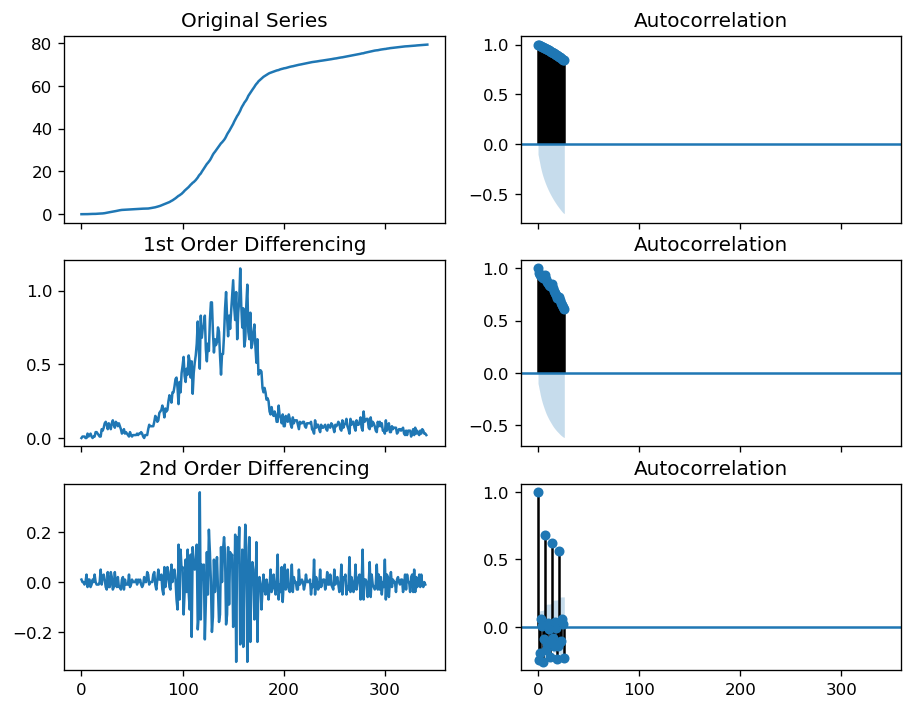

In [824]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(vr); axes[0, 0].set_title('Original Series')
plot_acf(vr, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(vr)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(vr), ax=axes[1, 1])
diffvr = np.diff(vr)

# 2nd Differencing
axes[2, 0].plot(np.diff(diffvr)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(diffvr), ax=axes[2, 1])
#plt.show()

"""
# 3rd Differencing
diffvr2 = np.diff(diffvr)
axes[3, 0].plot(np.diff(diffvr2)); axes[3, 0].set_title('3nd Order Differencing')
plot_acf(np.diff(diffvr2), ax=axes[3, 1])
"""
plt.show()

In [825]:
model = pm.auto_arima(vr, start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=4, max_q=4, # maximum p and q
m=1, # frequency of series
d=None, # let model determine 'd'
seasonal=False, # No Seasonality
start_P=0,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-104.728, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3713.639, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-805.313, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-818.800, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-338.133, Time=0.27 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-819.779, Time=0.28 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=-817.309, Time=0.20 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-802.762, Time=0.53 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.43 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-817.892, Time=0.29 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=-807.616, Time=0.

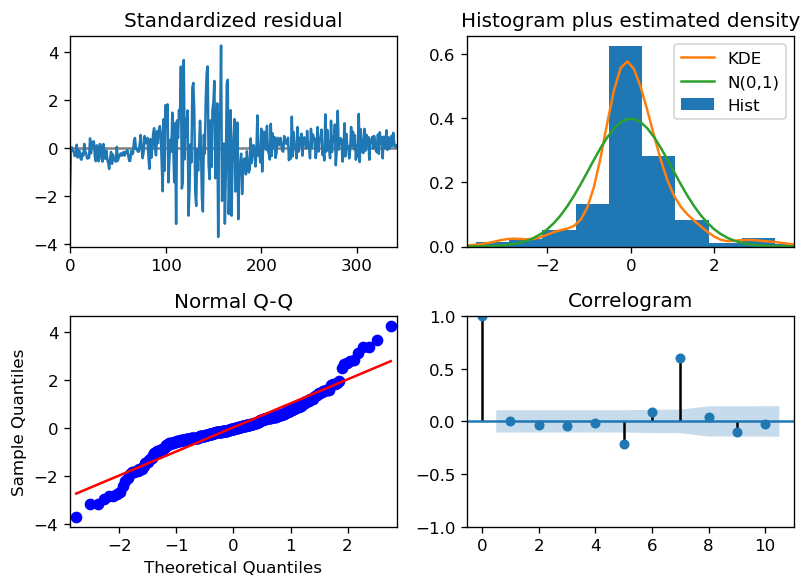

In [826]:
model.plot_diagnostics(figsize=(7,5))
plt.tight_layout()# avoid overlapping of subplot titles and x labels
plt.show()

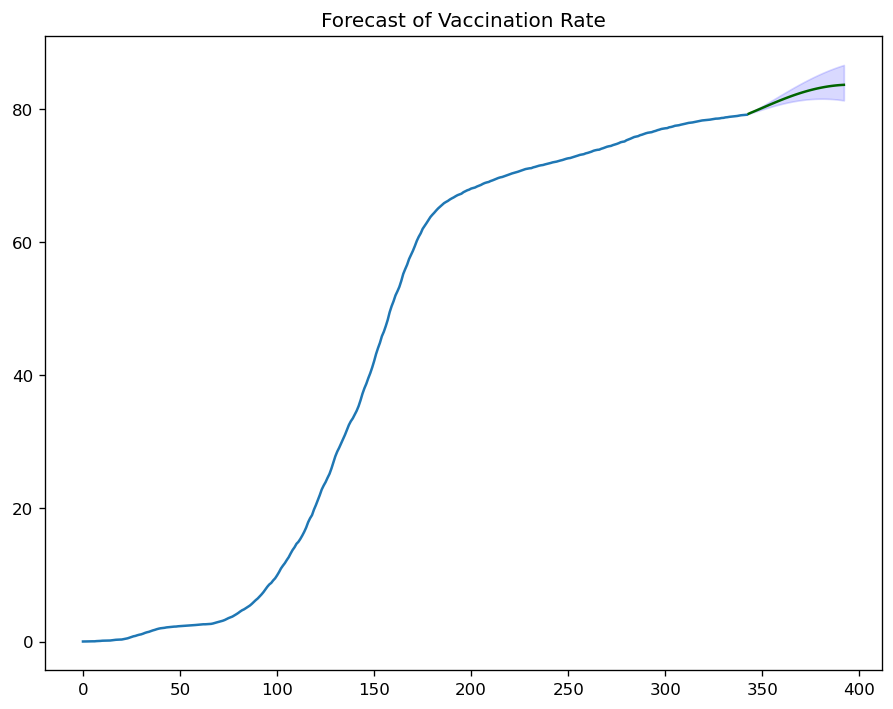

The best case has a vaccination rate of 86.69348215381378
The base case has a vaccination rate of 83.70558451037101
The worst case has a vaccination rate of 81.36545208804993


In [827]:
# Forecast
n_periods = 50
#fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
fc1, confint1 = model.predict(n_periods=n_periods, return_conf_int=True,alpha = 0.01)
fc2, confint2 = model.predict(n_periods=n_periods, return_conf_int=True,alpha = 0.1)
fc3, confint3 = model.predict(n_periods=n_periods, return_conf_int=True,alpha = 0.04)
index_of_fc = np.arange(len(vr), len(vr)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(confint3[:, 1], index=index_of_fc)
lower_series = pd.Series(confint2[:, 1], index=index_of_fc)
upper_series = pd.Series(confint1[:, 1], index=index_of_fc)

# Plot
plt.plot(vr)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='b', alpha=.15)
plt.title("Forecast of Vaccination Rate")
plt.show()

print("The best case has a vaccination rate of {}".format(list(upper_series)[-1]))
print("The base case has a vaccination rate of {}".format(list(fc_series)[-1]))
print("The worst case has a vaccination rate of {}".format(list(lower_series)[-1]))

Next, we applied ARIMA model on the US's vaccination rate

In [828]:
df_us = df[df['location'] == 'United States'] 
df_us

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
33346,United States,USA,2020-12-13,21800.0,18529.0,3875.0,0.0,0.0,0.0,0.01,0.01,0.00,0.00,0.0,0.0,0.000
33347,United States,USA,2020-12-14,26124.0,22716.0,3971.0,0.0,4324.0,4324.0,0.01,0.01,0.00,0.00,13.0,4187.0,0.001
33348,United States,USA,2020-12-15,74833.0,69226.0,4166.0,0.0,48709.0,26516.0,0.02,0.02,0.00,0.00,79.0,25348.0,0.008
33349,United States,USA,2020-12-16,233645.0,222604.0,4548.0,0.0,158812.0,70615.0,0.07,0.07,0.00,0.00,210.0,68025.0,0.020
33350,United States,USA,2020-12-17,504183.0,486107.0,5110.0,0.0,270538.0,120596.0,0.15,0.14,0.00,0.00,359.0,116894.0,0.035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33685,United States,USA,2021-11-17,449028238.0,229584222.0,194561634.0,33834775.0,1479995.0,1297921.0,133.51,68.26,57.85,10.06,3859.0,444416.0,0.132
33686,United States,USA,2021-11-18,450381454.0,229972864.0,194694936.0,34677686.0,1353216.0,1288385.0,133.91,68.38,57.89,10.31,3831.0,427578.0,0.127
33687,United States,USA,2021-11-19,451355421.0,230255670.0,194788580.0,35282993.0,973967.0,1174321.0,134.20,68.46,57.92,10.49,3492.0,383614.0,0.114
33688,United States,USA,2021-11-20,451453834.0,230298744.0,194797007.0,35329604.0,98413.0,1039368.0,134.23,68.48,57.92,10.50,3090.0,321539.0,0.096


In [829]:
# get the vaccination rate of the US in sequence of time
vr = df_us['people_vaccinated_per_hundred'].values

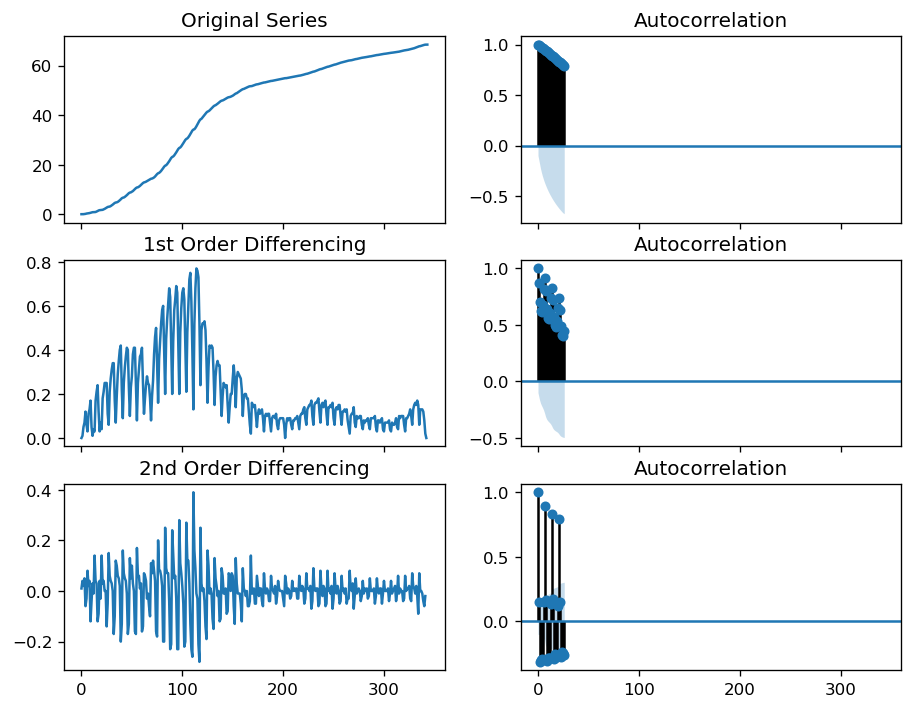

In [830]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(vr); axes[0, 0].set_title('Original Series')
plot_acf(vr, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(vr)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(vr), ax=axes[1, 1])
diffvr = np.diff(vr)

# 2nd Differencing
axes[2, 0].plot(np.diff(diffvr)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(diffvr), ax=axes[2, 1])
#plt.show()

"""
# 3rd Differencing
diffvr2 = np.diff(diffvr)
axes[3, 0].plot(np.diff(diffvr2)); axes[3, 0].set_title('3nd Order Differencing')
plot_acf(np.diff(diffvr2), ax=axes[3, 1])
"""
plt.show()

In [831]:
model = pm.auto_arima(vr, start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=5, max_q=5, # maximum p and q
m=1, # frequency of series
d=None, # let model determine 'd'
seasonal=False, # No Seasonality
start_P=0,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-748.796, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-711.986, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-717.905, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-727.220, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-713.986, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-846.815, Time=0.26 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-759.470, Time=0.08 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-855.893, Time=0.39 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-773.471, Time=0.17 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=-909.189, Time=0.61 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=-827.563, Time=0.23 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=-993.494, Time=0.76 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=-969.840, Time=0.49 sec
 ARIMA(5,2,2)(0,0,0)[0] intercept   : AIC=-1095.548, Time=0.95 sec
 ARIMA(4,2,2)(0,0,0)[0] intercep

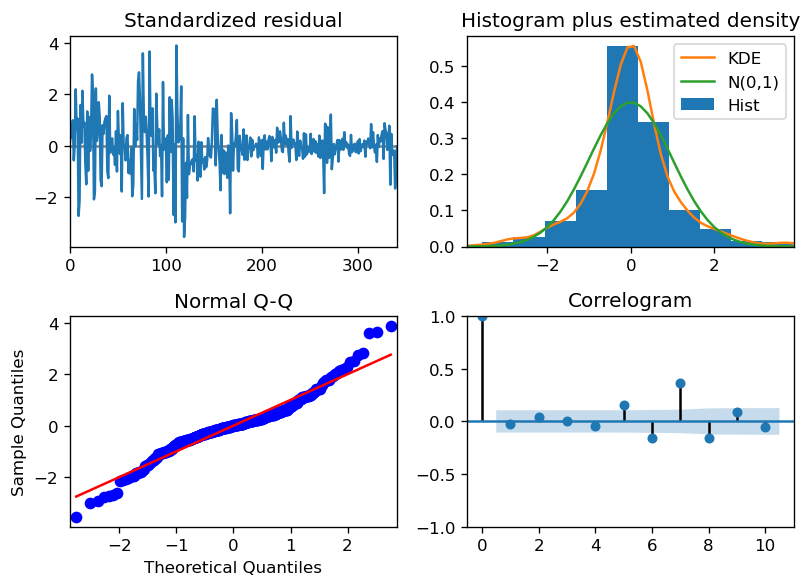

In [832]:
model.plot_diagnostics(figsize=(7,5))
plt.tight_layout()# avoid overlapping of subplot titles and x labels
plt.show()

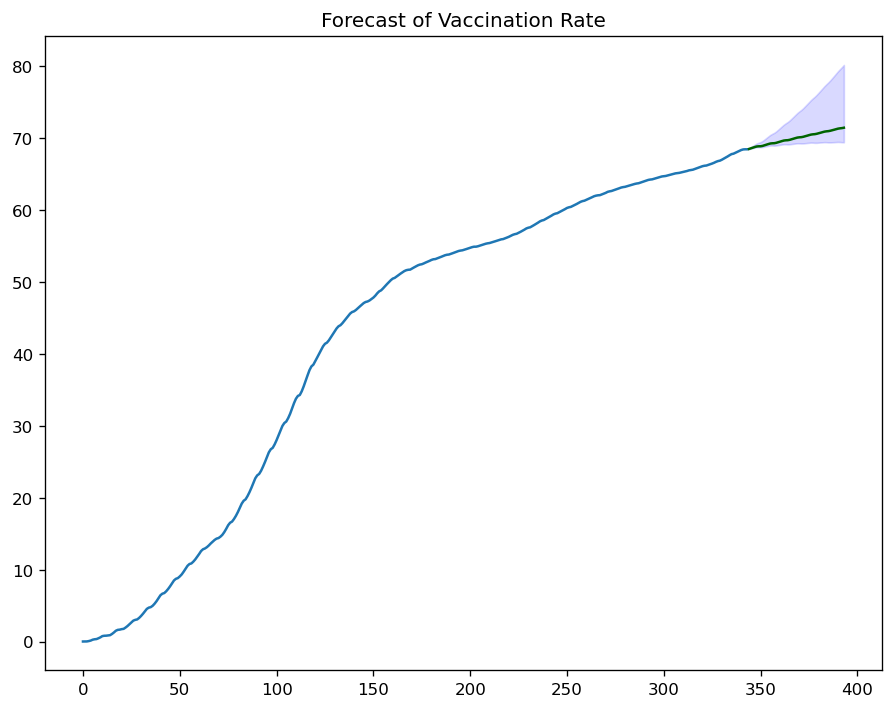

The best case has a vaccination rate of 80.21046388696445
The base case has a vaccination rate of 71.4778180679805
The worst case has a vaccination rate of 69.45607454409125


In [833]:
# Forecast
n_periods = 50
fc1, confint1 = model.predict(n_periods=n_periods, return_conf_int=True,alpha = 0.05)
fc2, confint2 = model.predict(n_periods=n_periods, return_conf_int=True,alpha = 0.65)
index_of_fc = np.arange(len(vr), len(vr)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc1, index=index_of_fc)
lower_series = pd.Series(confint2[:, 0], index=index_of_fc)
upper_series = pd.Series(confint1[:, 1], index=index_of_fc)

# Plot
plt.plot(vr)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='b', alpha=.15)
plt.title("Forecast of Vaccination Rate")
plt.show()

print("The best case has a vaccination rate of {}".format(list(upper_series)[-1]))
print("The base case has a vaccination rate of {}".format(list(fc_series)[-1]))
print("The worst case has a vaccination rate of {}".format(list(lower_series)[-1]))

PART4 Relating COVID-19 Vaccination to a Second Dataset

In [849]:
df_complete = pd.read_csv("Complete_covid19_dataset.csv")
df_complete.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [850]:
# we are only interested in the 2 countries we selected
df_canada2 = df_complete[df_complete['iso_code']=='CAN']
df_us2 = df_complete[df_complete['iso_code']=='USA']

In [851]:
df_canada2 = df_canada2[['location','date','new_cases']].dropna()

In [852]:
df_us2 = df_us2[['location','date','new_cases']].dropna()

we will join the new_cases data with the vaccination rate data using 'date' as the key

In [865]:
df_canada_data = pd.merge(df_canada2,df_canada[['date','people_vaccinated_per_hundred']], how='inner', on=['date'])\
.drop('location',axis = 1).reset_index(drop=True)
df_canada_data

,date,new_cases,people_vaccinated_per_hundred
0,2020-12-14,8645.0,0.00
1,2020-12-15,6291.0,0.00
2,2020-12-16,6733.0,0.01
3,2020-12-17,7467.0,0.02
4,2020-12-18,7045.0,0.03
...,...,...,...
336,2021-11-15,4370.0,78.99
337,2021-11-16,1816.0,79.02
338,2021-11-17,2526.0,79.08
339,2021-11-18,2798.0,79.13


In [866]:
df_us_data = pd.merge(df_us2,df_us[['date','people_vaccinated_per_hundred']], how='inner', on=['date'])\
.drop('location',axis = 1).reset_index(drop=True)
df_us_data

,date,new_cases,people_vaccinated_per_hundred
0,2020-12-13,186705.0,0.01
1,2020-12-14,200631.0,0.01
2,2020-12-15,222052.0,0.02
3,2020-12-16,240691.0,0.07
4,2020-12-17,237229.0,0.14
...,...,...,...
337,2021-11-15,138787.0,68.00
338,2021-11-16,87586.0,68.13
339,2021-11-17,111404.0,68.26
340,2021-11-18,109578.0,68.38


now we get our datasets for the 2 countries, we can now perform our analysis

analysis of relationship between the number of new COVID-19 cases and the rate of vaccination in Canada

In [943]:
# 'new_cases' and 'people_vaccinated_per_hundred' are negatively correlated
df_canada_data.corr()

,new_cases,people_vaccinated_per_hundred
new_cases,1.000000,-0.516251
people_vaccinated_per_hundred,-0.516251,1.000000


we can make a scatterplot to see their relationship

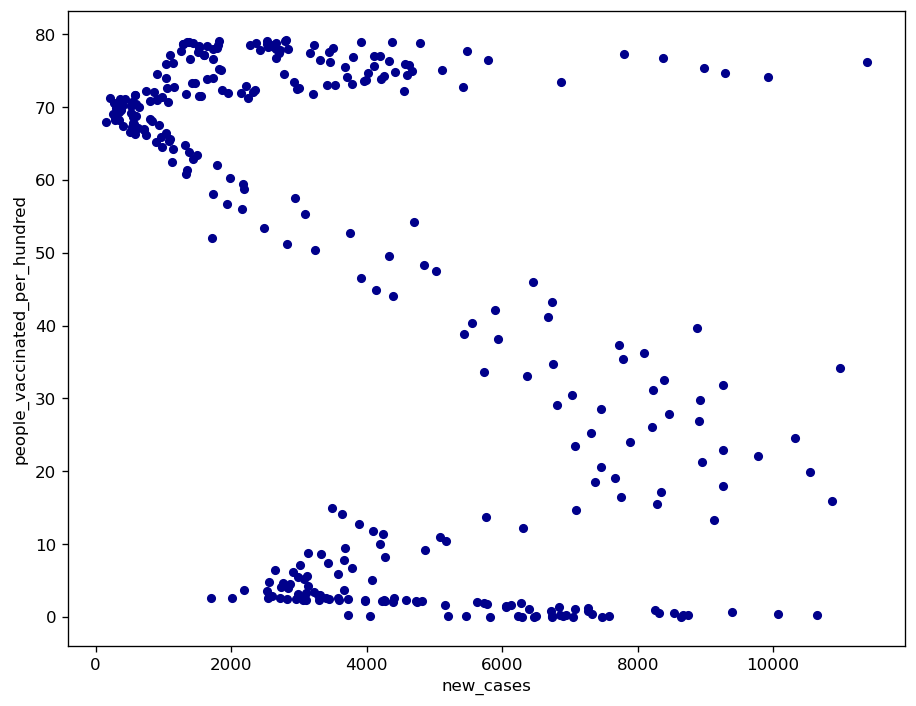

In [955]:
df_canada_data.plot.scatter(x='new_cases',y='people_vaccinated_per_hundred', c='DarkBlue')

It seems that the 2 variables has some non linear relationship, we will use linear regression to test if the relashionship is linear or non linear by looking at the loss.

we will first split the train and test set.

In [967]:
# it is time series data, we do not want to shuffle it or change its sequence. we do the split manually
threshold = int(.7 * len(df_canada_data))# use 70% training, 30% testing
x_train = df_canada_data['new_cases'].values[:threshold].reshape(-1, 1)
y_train = df_canada_data['people_vaccinated_per_hundred'].values[:threshold].reshape(-1, 1)
x_test = df_canada_data['new_cases'].values[threshold:].reshape(-1, 1)
y_test = df_canada_data['people_vaccinated_per_hundred'].values[threshold:].reshape(-1, 1)

we use sklearn.preprocessing.PolynomialFeatures to transfer linear features to higher dimensions.

Polynomial regression is a form of Linear regression where only due to the Non-linear relationship between dependent and independent variables. We add some polynomial terms to linear regression to convert it into Polynomial regression.

That is why Polynomial Regression is also called Polynomial Linear Regression

In [957]:
def regression_model_accuracy(degree):
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    x_train_trans = poly.fit_transform(x_train)
    x_test_trans = poly.transform(x_test)
    #include bias parameter
    lr = LinearRegression()
    lr.fit(x_train_trans, y_train)
    y_pred = lr.predict(x_test_trans)
    print("degree = {0}, error = {1}".format(degree, mean_absolute_error(y_test,y_pred)))

In [968]:
for i in range(1,16):
    regression_model_accuracy(degree = i)

degree = 1, error = 40.377302866953045
degree = 2, error = 44.30464839744698
degree = 3, error = 48.2389369608874
degree = 4, error = 47.92322957683981
degree = 5, error = 47.099834934407895
degree = 6, error = 43.858312769294656
degree = 7, error = 41.628412949075305
degree = 8, error = 40.36826873906552
degree = 9, error = 39.97847638617926
degree = 10, error = 40.139032595750365
degree = 11, error = 40.585062753826456
degree = 12, error = 41.21405592648076
degree = 13, error = 41.9646011720437
degree = 14, error = 42.77837665401874
degree = 15, error = 43.669099298127364


We are surprised to find that the linear model is as good as or even outperform many polynomial models we tested above(relatively low mse).

we can use the linear regression for modelling the relationship between the number of new COVID-19 cases and the rate of vaccination in Canada

Next we will analysis of relationship between the number of new COVID-19 cases and the rate of vaccination in the US

In [959]:
# 'new_cases' and 'people_vaccinated_per_hundred' are negatively correlated
df_us_data.corr()

,new_cases,people_vaccinated_per_hundred
new_cases,1.000000,-0.381354
people_vaccinated_per_hundred,-0.381354,1.000000


we can make a scatterplot to see their relationship

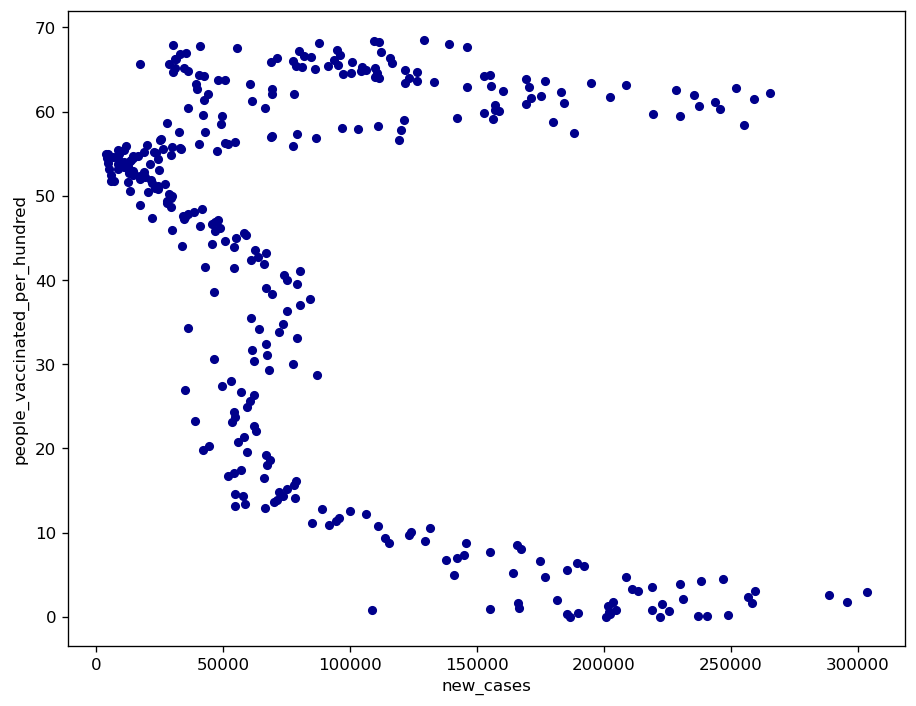

In [960]:
df_us_data.plot.scatter(x='new_cases',y='people_vaccinated_per_hundred', c='DarkBlue')

The relationship is non_linear either

In [961]:
# it is time series data, we do not want to shuffle it or change its sequence. we do the split manually
threshold = int(.7 * len(df_canada_data))# use 70% training, 30% testing
x_train = df_us_data['new_cases'].values[:threshold].reshape(-1, 1)
y_train = df_us_data['people_vaccinated_per_hundred'].values[:threshold].reshape(-1, 1)
x_test = df_us_data['new_cases'].values[threshold:].reshape(-1, 1)
y_test = df_us_data['people_vaccinated_per_hundred'].values[threshold:].reshape(-1, 1)

In [962]:
len(x_train)

238

In [966]:
for i in range(1,20):
    regression_model_accuracy(degree = i)

degree = 1, error = 38.26564334048298
degree = 2, error = 41.1013037320031
degree = 3, error = 41.09425206116808
degree = 4, error = 41.49188477573172
degree = 5, error = 40.46217698807645
degree = 6, error = 38.361712056891854
degree = 7, error = 36.4009947038947
degree = 8, error = 34.89016477081928
degree = 9, error = 33.805305192618725
degree = 10, error = 33.06633635328028
degree = 11, error = 32.59110327394417
degree = 12, error = 32.303581231605776
degree = 13, error = 32.136883095101055
degree = 14, error = 32.038196696521254
degree = 15, error = 31.972043926762886
degree = 16, error = 31.918673268148453
degree = 17, error = 31.86923855786869
degree = 18, error = 31.820811092028983
degree = 19, error = 31.77301886073088


we can see that as we increase the degree of polynomial, the model is doing better and better up to a degree where the MAE starts to decrease very slowly.

This suggests that the higher the degree, the better the model and the lower the loss. We can consider using regression models of higher degree (around 15).